$$
\gamma^{\text{eff}}_m(\omega) =\gamma_m +\frac{8\tilde{\Delta}\chi^2\omega_m^3|\bar{c}_s|^2\kappa}{\left(\kappa^2 + (\omega -  \tilde{\Delta})^2\right) \left(\kappa^2 + (\omega + \tilde{\Delta})^2\right)} = \gamma_m + \tilde{\gamma}(\omega)
$$

where,

$$
\tilde{\gamma}(\omega) = \frac{8\tilde{\Delta}\chi^2\omega_m^3|\bar{c}_s|^2\kappa}{\left(\kappa^2 + (\omega -  \tilde{\Delta})^2\right) \left(\kappa^2 + (\omega + \tilde{\Delta})^2\right)}
$$

Putting, $\omega = \omega_m$ and normalizing $\kappa$ and $\tilde{\Delta}$ w.r.t $\omega_m$ gives:

$$
\gamma^\prime(\omega_m) = \frac{\tilde{\gamma}(\omega_m)}{8\chi^2|\bar{c}_s|^2} = \frac{\tilde{\Delta}\kappa}{\left(\kappa^2 + (1 -  \tilde{\Delta})^2\right) \left(\kappa^2 + (1 + \tilde{\Delta})^2\right)}
$$

We will plot, $\gamma^\prime(\omega_m)$ vs $\tilde{\Delta}$ and not $\tilde{\gamma}(\omega)$ vs $\tilde{\Delta}$ or $\Delta$, which is actually the plot which we are looking for. But for simplicity we will assume $|\bar{c}_s|^2$ to be some constant independent of $\Delta$.

## Note

$$
|\bar{c}_s|^2 = \frac{\varepsilon^2}{\kappa^2 + \tilde{\Delta}^2}
$$

where, $\varepsilon = \sqrt{\frac{2\kappa\rho}{\hbar\omega_l}}$ is parameter dependent on driving laser power ($\rho$). Putting the expression of effective detuning, $\tilde{\Delta} = \Delta - 2\chi|\bar{c}_s|^2$ in the above equation gives a cubic equation:

$$
N_0^3 - \frac{\Delta}{\chi^2 } N_0^2 + N_0\left(\frac{\kappa^2 + \Delta^2}{4\chi^4 }\right) - \frac{\varepsilon^2}{4\chi^4 } = 0
$$

where, $N_0 = |\bar{c}_s|^2$. Ideally we have to find the roots of the above equation and pick any of the real roots and put it in the expression of $\tilde{\gamma}(\omega)$. This will give the exact graph of $\tilde{\gamma}(\omega)$ vs $\tilde{\Delta}$ or $\Delta$.





## Important tip:
You have to make sure that the code works both with normalized parameters and the actual values of the parameters

# Libraries

In [35]:
import numpy as np
import scipy.constants as sc

# Constants (SI)

In [36]:
hbar = sc.hbar
speed_of_light = sc.c       # speed of light in vacuum
KB = sc.k                   # Boltzman constant
pi = sc.pi
iota = complex(0,1)

# Parameters (SI)

In [37]:
mass    = 145e-12
omega_m = 2*pi*947e3
gamma_m_0 = omega_m/6700
length = 25e-3
g_0 = 2*pi*2.7

lambda_l = 1064e-9
omega_l = 2*pi*speed_of_light/lambda_l
power_0 = 40e-3

# Normalized parameters

In [38]:
gamma_m = gamma_m_0/omega_m
chi = g_0/omega_m

# Main code

In [39]:
import numpy as np

# Define the function
def gamma(delta, kappa):
    kappa_0 = kappa*omega_m
    delta_0 = delta*omega_m
    epsilon = np.sqrt(2*kappa_0*power_0/(hbar*omega_l))
    G = chi*epsilon/(kappa_0 + iota*delta_0)
#    constant = 8*np.abs(G)**2                              # disable this and enable the next line to get a smooth curve  
    constant = 1
    return constant*(delta*kappa)/((kappa**2 + (1 - delta)**2)*(kappa**2 + (1 + delta)**2))


# Plots

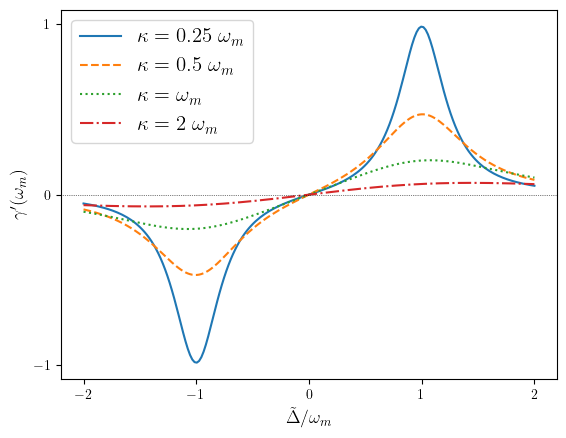

In [40]:
import matplotlib.pyplot as plt
# enable TeX fonts
plt.rcParams['text.usetex'] = True

# Define the range for x
x = np.linspace(-2, 2, 200)

# Define different parameter values
kappa_s_and_linestyles = [(0.25,'-'), (0.5,'--'), (1,':'), (2,'-.')]  # kappa and linestyles

# Plot the function for each set of parameters
for kappa, linestyle in kappa_s_and_linestyles:
    y = gamma(x, kappa)
    plt.plot(x, y, label = r'$\kappa= %g\; \omega_m$' % kappa if kappa != 1 else r'$\kappa=\omega_m$', linestyle=linestyle)

# Plot the zero line
plt.axhline(y=0, color='black', linestyle=':', linewidth=0.5)  # Add zero line
   
# Add labels and legend
plt.xlabel(r'$\tilde{\Delta}/\omega_m$', fontsize = 13)
plt.ylabel(r'$\gamma^\prime(\omega_m)$', fontsize = 13)
plt.legend(loc="upper left", fontsize = 15)

# axis ticks
plt.xticks(np.arange(-2, 2.5, 1))
plt.yticks(np.arange(-1, 1.5, 1))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)  

# save the plot to a file
plt.savefig('figure6.png')


plt.show()